<a href="https://colab.research.google.com/github/jasgunchandnani/SentimentAnalysis-BACustomerReviews/blob/main/BookingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORING AND PREPARING THE DATASET


In [ ]:
import pandas as pd
import numpy as np

# Load the Dataset
df = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')

# Understand the Data
print("Data Overview:")
print(df.head())        # Display the first few rows of the dataset
print("\nData Info:")
print(df.info())        # Information about data types and missing values
print("\nStatistical Summary:")
print(df.describe())    # Basic statistics for numerical columns

# Data Cleaning
# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())    # Count missing values per column

# Assuming we drop rows with missing values for simplicity
df = df.dropna()


Data Overview:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0               

In [ ]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nModified DataFrame with One-Hot Encoding:")
print(df.head())


Modified DataFrame with One-Hot Encoding:
   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Mobile  ...  \
0             5.52                 0                 False  ...   
1    

##FEATURE SELECTION

Top 10 Feature Ranking:
1. Feature purchase_lead (0.155919611381035)
2. Feature flight_hour (0.12791224720257602)
3. Feature length_of_stay (0.11632770269302956)
4. Feature num_passengers (0.04817186185922785)
5. Feature flight_duration (0.03548981520263715)
6. Feature booking_origin_Malaysia (0.027879120391402355)
7. Feature wants_in_flight_meals (0.022633390603258335)
8. Feature booking_origin_Australia (0.020473672195424203)
9. Feature wants_preferred_seat (0.01943135731457126)
10. Feature wants_extra_baggage (0.01674776603978314)
11. Feature flight_day_Tue (0.016656912150759248)
12. Feature flight_day_Mon (0.0164967700788389)
13. Feature flight_day_Wed (0.016333396201355946)
14. Feature flight_day_Thu (0.015809349644624607)
15. Feature flight_day_Sun (0.014428449410471722)


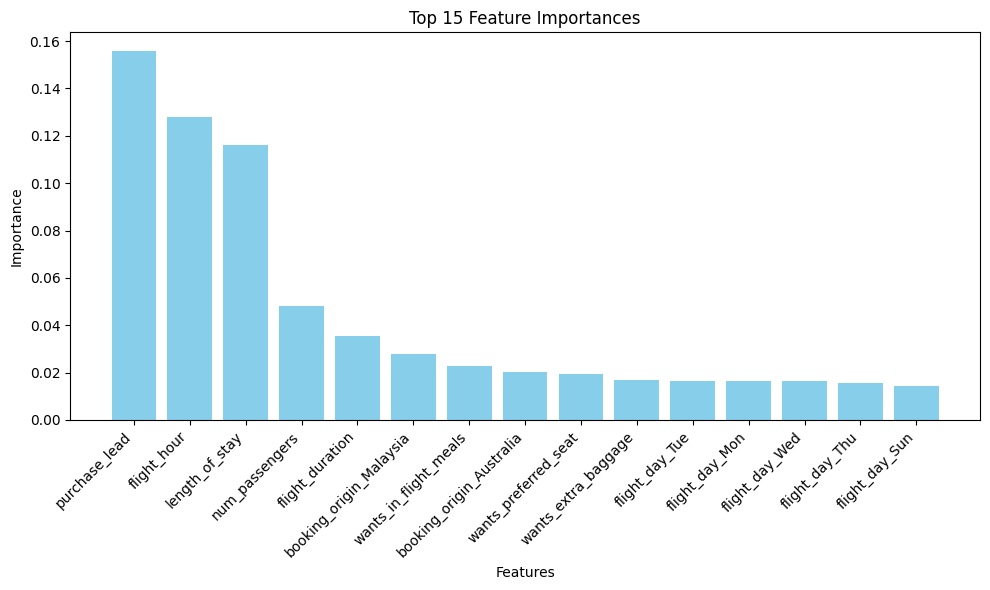

In [ ]:
# Limit to the top 10 features for clarity
top_n = 15
top_indices = indices[:top_n]

# Print the top 10 feature ranking
print("Top 10 Feature Ranking:")

for i in range(top_n):
    print(f"{i + 1}. Feature {X.columns[top_indices[i]]} ({importances[top_indices[i]]})")

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(top_n), importances[top_indices], align="center", color='skyblue')
plt.xticks(range(top_n), X.columns[top_indices], rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#TRAINING MODEL & EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Select the top features
top_features = [
    'purchase_lead', 'flight_hour', 'length_of_stay', 'num_passengers',
    'flight_duration', 'booking_origin_Malaysia', 'wants_in_flight_meals',
    'booking_origin_Australia', 'wants_preferred_seat', 'wants_extra_baggage'
]

# Create a new DataFrame with only the top features
X_top = df[top_features]
y = df['booking_complete']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8473
Precision: 0.4423
Recall: 0.1216
F1-Score: 0.1908

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      8520
           1       0.44      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.55      0.55     10000
weighted avg       0.80      0.85      0.81     10000



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.93      0.51      0.65      8520
           1       0.21      0.78      0.34      1480

    accuracy                           0.55     10000
   macro avg       0.57      0.64      0.50     10000
weighted avg       0.82      0.55      0.61     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1-Score: {f1_xgb:.4f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:44:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8479
XGBoost Precision: 0.4221
XGBoost Recall: 0.0750
XGBoost F1-Score: 0.1274

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.42      0.07      0.13      1480

    accuracy                           0.85     10000
   macro avg       0.64      0.53      0.52     10000
weighted avg       0.79      0.85      0.80     10000



##DOING SAMPLING TO BALANCE DATASET AND IMPROVE RESULTS

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the XGBoost model on the resampled data
xgb.fit(X_resampled, y_resampled)
y_pred_xgb_resampled = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb_resampled))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8520
           1       0.35      0.28      0.31      1480

    accuracy                           0.82     10000
   macro avg       0.61      0.59      0.60     10000
weighted avg       0.80      0.82      0.81     10000



In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', xgb)
]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_resampled, y_resampled)
y_pred_stacking = stacking.predict(X_test)

print(classification_report(y_test, y_pred_stacking))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      8520
           1       0.28      0.55      0.37      1480

    accuracy                           0.72     10000
   macro avg       0.59      0.65      0.60     10000
weighted avg       0.81      0.72      0.76     10000

